In [1]:
# !pip install cv2
import cv2
from matplotlib import pyplot as plt
import os

# 1. Training

 --weights for finetuning pretrained model

In [2]:
# Navigate into training/evaluation working directory def train(hyp, opt, device, tb_writer=None):
os.chdir("/yolov7/")

In [ ]:
python train.py --workers 8 --device 0 --batch-size 32 \
    --data /data/sam.yaml --img 224 224 --cfg cfg/training/yolov7-tiny-sam.yaml\
    --weights ./yolov7-tiny.pt --name yolov7 --hyp data/hyp.scratch.p5.yaml \
    --epochs 100

In [ ]:
# freeze ever layer from 0 to 73 only leave laster layers 74, 75, 76 unfrozen
!python train.py --workers 8 --device 0 --batch-size 32 \
    --data /data/sam.yaml --img 224 224 --cfg cfg/training/yolov7-tiny-sam.yaml \
    --weights ./yolov7-tiny.pt --hyp data/hyp.scratch.p5.yaml \
    --freeze 74 --epochs 100 --name yolov7-tiny-frozen

YOLOR 🚀 f32e9eb torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3070, 7959.8125MB)

Namespace(adam=False, adamW=False, artifact_alias='latest', batch_size=32, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7-tiny-sam.yaml', data='/data/sam.yaml', device='0', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[74], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[224, 224], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7-tiny-frozen', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7-tiny-frozen', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=32, upload_dataset=False, v5_metric=False, weights='./yolov7-tiny.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, wei

Model Summary: 263 layers, 6031224 parameters, 6031224 gradients, 13.2 GFLOPS

Transferred 330/344 items from ./yolov7-tiny.pt
freezing model.0.conv.weight
freezing model.0.bn.weight
freezing model.0.bn.bias
freezing model.1.conv.weight
freezing model.1.bn.weight
freezing model.1.bn.bias
freezing model.2.conv.weight
freezing model.2.bn.weight
freezing model.2.bn.bias
freezing model.3.conv.weight
freezing model.3.bn.weight
freezing model.3.bn.bias
freezing model.4.conv.weight
freezing model.4.bn.weight
freezing model.4.bn.bias
freezing model.5.conv.weight
freezing model.5.bn.weight
freezing model.5.bn.bias
freezing model.7.conv.weight
freezing model.7.bn.weight
freezing model.7.bn.bias
freezing model.9.conv.weight
freezing model.9.bn.weight
freezing model.9.bn.bias
freezing model.10.conv.weight
freezing model.10.bn.weight
freezing model.10.bn.bias
freezing model.11.conv.weight
freezing model.11.bn.weight
freezing model.11.bn.bias
freezing model.12.conv.weight
freezing model.12.bn.weight

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     32/99    0.963G   0.04072  0.002689  0.004829   0.04824        47       224
               Class      Images      Labels           P           R      mAP@.5
                 all        4138        7584       0.761       0.584       0.656       0.353

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     33/99    0.963G   0.03806  0.002703  0.004398   0.04516        29       224
               Class      Images      Labels           P           R      mAP@.5
                 all        4138        7584       0.776       0.576       0.656       0.353

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     34/99    0.963G   0.03998  0.002722  0.004696    0.0474        52       224
               Class      Images      Labels           P           R      mAP@.5
                 all        4138        7584       0.751       0.597       0.657       0.356

     Epoch   gpu_mem       box       obj       cls     total    labels

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     57/99    0.963G   0.04044  0.003231  0.004536   0.04821        48       224
               Class      Images      Labels           P           R      mAP@.5
                 all        4138        7584       0.763       0.629       0.688       0.378

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     58/99    0.963G   0.03778  0.003203  0.004184   0.04517        61       224
               Class      Images      Labels           P           R      mAP@.5
                 all        4138        7584       0.774       0.621       0.688       0.379

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     59/99    0.963G    0.0386  0.003226  0.004398   0.04623        57       224
               Class      Images      Labels           P           R      mAP@.5
                 all        4138        7584       0.769       0.624       0.688       0.378

     Epoch   gpu_mem       box       obj       cls     total    labels

# 2. Evaluation

Evaluate the model

In [5]:
model_name = "yolov7-sgd-gelu"

In [13]:
os.chdir("/yolov7/")

!python test.py --img 224 --batch 32 --device 0 \
    --data /data/sam_benchmark.yaml \
    --weights runs/train/{model_name}/weights/best.pt \
    --conf 0.001 \
    --iou 0.65 \
    --name {model_name}-val \
    --save-json \
    --save-txt

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/data/sam_benchmark.yaml', device='0', exist_ok=False, img_size=224, iou_thres=0.65, name='yolov7-sgd-gelu-val', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=True, save_txt=True, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['runs/train/yolov7-sgd-gelu/weights/best.pt'])
YOLOR 🚀 f32e9eb torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3070, 7959.8125MB)

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6045480 parameters, 0 gradients, 13.1 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

val: Scanning '/data/benchmarks/yolo_1_Aussenbahn_Tag/benchmark.cache' images an
               Class      Images      Labels           P           R      mAP@.5
                 all        2965        5523       0.797       0.589       0.655       0.346
              person        2965        2392       0.759       0.511    

<function matplotlib.pyplot.show(close=None, block=None)>

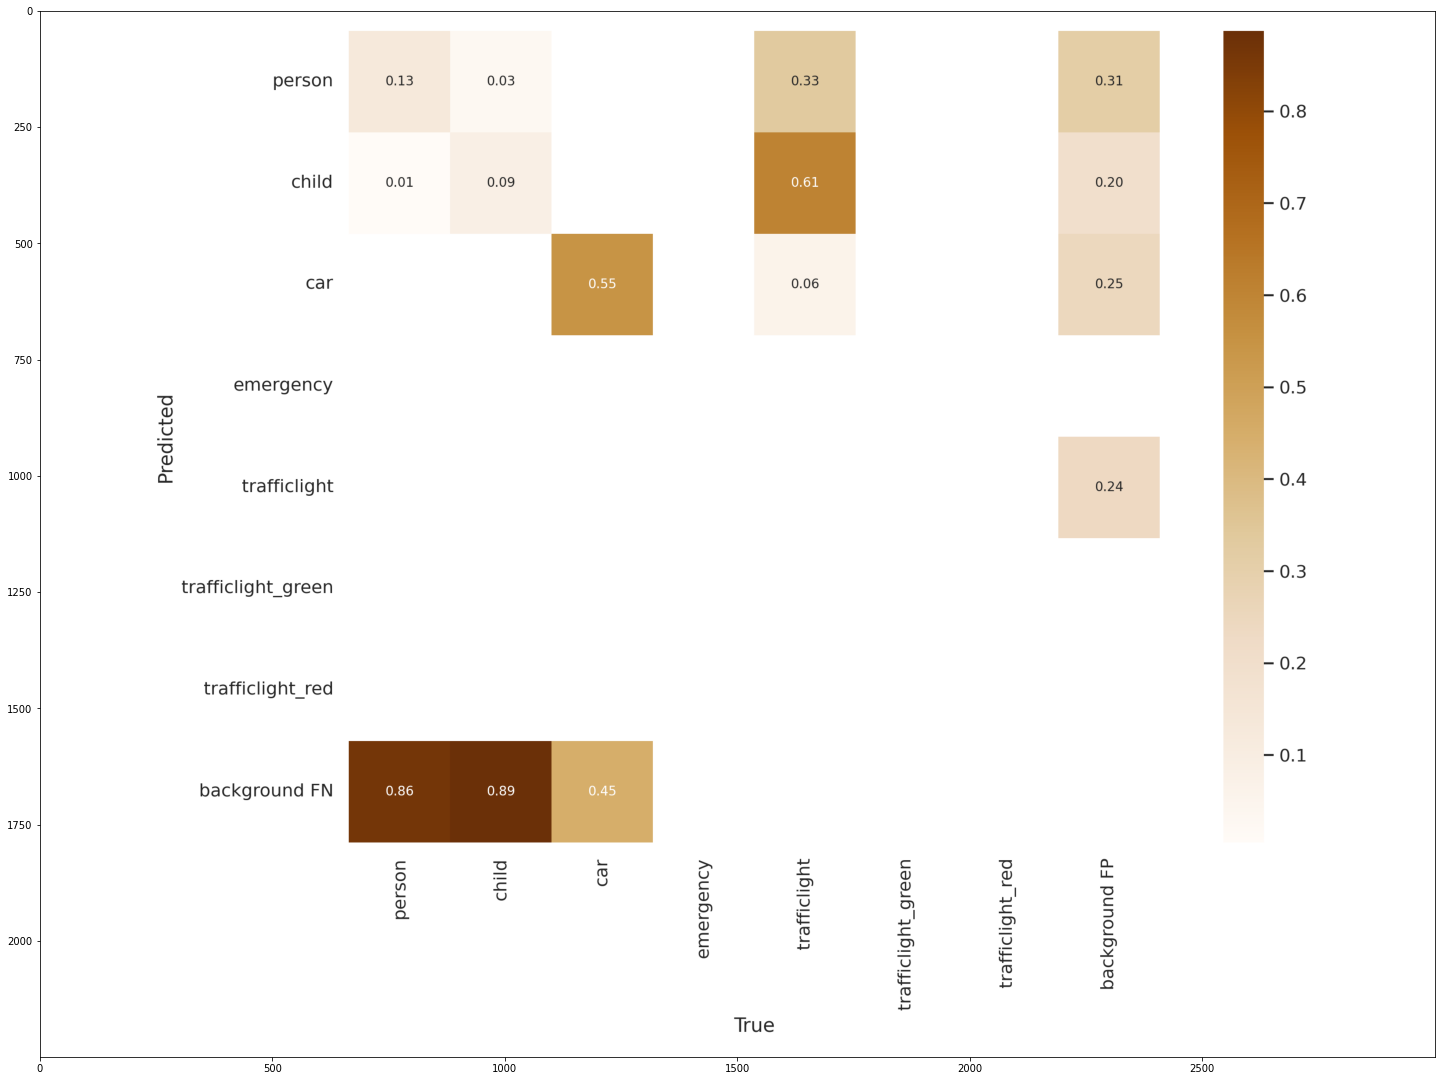

In [8]:
fig = plt.figure(figsize=(25,25))
fig =plt.imshow(cv2.imread(f"/yolov7/runs/test/{model_name}-val/confusion_matrix.png"))
plt.show

In [ ]:
import argparse
import json
import os
from pathlib import Path
from threading import Thread

import numpy as np
import torch
import yaml
from tqdm import tqdm
from models.experimental import attempt_load
from utils.loss import ComputeLoss


from utils.datasets import create_dataloader
from utils.general import coco80_to_coco91_class, check_dataset, check_file, check_img_size, check_requirements, \
    box_iou, non_max_suppression, scale_coords, xyxy2xywh, xywh2xyxy, set_logging, increment_path, colorstr
from utils.metrics import ap_per_class, ConfusionMatrix
from utils.plots import plot_images, output_to_target, plot_study_txt
from utils.torch_utils import select_device, time_synchronized, TracedModel

In [ ]:
imgsz = 224
batch_size=3
dataFile = '/data/sam.yaml'
opt = argparse.Namespace()
opt.single_cls = True
task = 'val'
conf_thres = 0.3
iou_thres = 0.5

device = ('cuda:0' if torch.cuda.is_available else 'cpu')
model = attempt_load('yolov7.pt', map_location=device)  # load FP32 model
gs = max(int(model.stride.max()), 32)  # grid size (max stride)

imgsz = check_img_size(imgsz, s=gs)  # check img_size

In [ ]:
import torchvision
with open(dataFile) as f:
    data = yaml.load(f, yaml.SafeLoader)
check_dataset(data)

dataloader = create_dataloader(data[task], imgsz, batch_size, gs, opt, pad=0.5, rect=True, prefix=colorstr(f'{task}: '))[0]

for batch_i, (img, targets, paths, shapes) in enumerate(tqdm(dataloader, desc=False)):
        img = img.to(device, non_blocking=True)
        img = img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        targets = targets.to(device)
        nb, _, height, width = img.shape  # batch size, channels, height, width
        
        
        with torch.no_grad():
            out, train_out = model(img, augment=True)  
            
            # Run NMS
            targets[:, 2:] *= torch.Tensor([width, height, width, height]).to(device)  # to pixels
            lb = [targets[targets[:, 0] == i, 1:] for i in range(nb)] # for autolabelling
            out = non_max_suppression(out, conf_thres=conf_thres, iou_thres=iou_thres, labels=lb, multi_label=True)
        
        for si, pred in enumerate(out):
            labels = targets[targets[:, 0] == si, 1:]
            nl = len(labels)
            tcls = labels[:, 0].tolist() if nl else []  # target class
            path = Path(paths[si])

            if len(pred) == 0:
                if nl:
                    stats.append((torch.zeros(0, niou, dtype=torch.bool), torch.Tensor(), torch.Tensor(), tcls))
                continue


        break

In [ ]:
def output_to_target(output, scale=640):
    # Convert model output to target format [batch_id, class_id, x, y, w, h, conf]
    targets = []
    for i, o in enumerate(output):
        for *box, conf, cls in o.cpu().numpy():
            targets.append([i, cls, *list(*xyxy2xywh((np.array(box)*scale)[None])), conf])
    return np.array(targets)

In [ ]:
size = 1024
img2 = torchvision.transforms.Resize(size)(img)
plt.imshow(plot_images(img2,output_to_target(out, size/img.shape[2]), max_size=1024))

In [ ]:
torchvision.transforms.ToPILImage()(img[0])

 Download, extract and convert dataset

In [26]:
!pip install pandas
!pip install wget
import wget
import tarfile
import os
import pandas as pd
import yaml
import matplotlib.pyplot as plt

In [59]:
url_15_dataset = "https://sam.cs.hm.edu/samcloud/index.php/s/fzby8CQYM5pxKa3/download/15_Combination_Dataset_13_14.tar.gz"
path = "/data/15_dataset/15_Combination_Dataset_13_14.tar.gz"

os.chdir('/data/15_dataset/')
os.getcwd( )

wget.download(url_15_dataset, path)

file = tarfile.open(path)  
file.extractall('/data/15_dataset/')
file.close()
os.remove(path)

'/data/15_dataset/15_Combination_Dataset_13_14.tar.gz'

In [81]:
!python3 sam2coco.py --label-file labels.txt --images images/ --out-dir converted/

image_011662.jpg 0 0.938672 0.534375 0.0351562 0.164583
image_008360.jpg 1 0.191406 0.586458 0.0421875 0.0958333
image_007060.jpg 0 0.0621094 0.505208 0.0351562 0.11875
image_000672.jpg 2 0.394141 0.55052 0.321094 0.234375
image_000672.jpg 0 0.244531 0.576042 0.078125 0.0375
image_004129.jpg 1 0.300391 0.676562 0.0554688 0.0947917
image_004129.jpg 0 0.798047 0.534375 0.0445313 0.177083
image_004129.jpg 2 0.696484 0.519792 0.119531 0.0791667
image_007637.jpg 1 0.842188 0.642188 0.0453125 0.117708
image_004041.jpg 0 0.891407 0.560937 0.0578125 0.319791
image_005659.jpg 0 0.171094 0.53073 0.0625 0.215625
SS22_image_000840.jpg 0 0.412296 0.533261 0.0367647 0.149101
SS22_image_000840.jpg 0 0.846152 0.531389 0.0350625 0.13175
SS22_image_000840.jpg 2 0.0945313 0.597396 0.190625 0.307292
SS22_image_000304.jpg 1 0.366928 0.604978 0.0367188 0.0645833
SS22_image_000304.jpg 1 0.586094 0.755526 0.096172 0.210031
SS22_image_000304.jpg 2 0.857406 0.542626 0.2 0.147917
image_012210.jpg 0 0.577344 0.50

image_012999.jpg 1 0.266797 0.732812 0.0914063 0.096875
image_012999.jpg 1 0.473438 0.747396 0.090625 0.103125
image_012999.jpg 1 0.688281 0.717187 0.0859375 0.103125
image_010493.jpg 2 0.441016 0.541146 0.186719 0.138542
image_009193.jpg 0 0.537109 0.540625 0.0507812 0.1625
image_009193.jpg 0 0.569922 0.535937 0.0320313 0.126042
14_image_000686.jpg 12 0.0491851 0.530359 0.0798698 0.100243
14_image_000686.jpg 11 0.323977 0.531606 0.0884703 0.0953279
14_image_000686.jpg 0 0.255982 0.566977 0.0225274 0.0573121
14_image_000686.jpg 7 0.201941 0.540388 0.01875 0.0427083
14_image_000686.jpg 9 0.101562 0.522396 0.0296875 0.0322917
14_image_000686.jpg 1 0.0996094 0.545833 0.0117188 0.01875
image_000454.jpg 0 0.0613281 0.529687 0.0773438 0.226042
image_000454.jpg 2 0.709375 0.548958 0.225 0.15625
image_000454.jpg 0 0.900781 0.511979 0.0359375 0.0947917
image_000454.jpg 0 0.585547 0.509896 0.0304688 0.0572917
SS22_image_000655.jpg 2 0.300045 0.551994 0.282813 0.2375
SS22_image_000655.jpg 1 0.464

SS22_image_000959.jpg 0 0.912638 0.532759 0.0351562 0.145833
SS22_image_000959.jpg 2 0.657353 0.558087 0.3375 0.25625
SS22_image_000959.jpg 0 0.273308 0.526207 0.114063 0.31875
image_012569.jpg 0 0.9125 0.564063 0.0796875 0.398958
image_003801.jpg 0 0.666016 0.564583 0.0773438 0.360417
image_003801.jpg 0 0.0449219 0.5125 0.0289063 0.14375
image_008471.jpg 0 0.765234 0.536458 0.0539063 0.20625
image_001896.jpg 0 0.807813 0.538021 0.0625 0.217708
image_001896.jpg 2 0.646484 0.523958 0.125781 0.1
image_001576.jpg 0 0.940234 0.532292 0.0351562 0.164583
image_012772.jpg 2 0.0757813 0.51875 0.0937505 0.0958333
SS22_image_001087.jpg 0 0.222088 0.511221 0.0351562 0.0979167
SS22_image_001087.jpg 0 0.300046 0.518455 0.0296875 0.111458
SS22_image_001087.jpg 1 0.346307 0.555174 0.028125 0.05
SS22_image_001087.jpg 0 0.409346 0.517784 0.040625 0.11875
SS22_image_001087.jpg 1 0.46484 0.553597 0.0315046 0.0607984
SS22_image_001087.jpg 1 0.526132 0.561274 0.0374531 0.0754375
SS22_image_001087.jpg 2 0.6

image_003972.jpg 0 0.653906 0.529687 0.03125 0.105208
val_image_000976.jpg 2 0.49375 0.517188 0.1625 0.111458
val_image_000976.jpg 0 0.392969 0.517708 0.0515625 0.15625
val_image_000976.jpg 1 0.366406 0.583333 0.040625 0.08125
val_image_000976.jpg 0 0.599609 0.515104 0.0445313 0.148958
val_image_000976.jpg 1 0.619141 0.581771 0.0367188 0.0864583
image_000504.jpg 1 0.866407 0.619792 0.0421875 0.1
image_000690.jpg 2 0.899609 0.561979 0.197656 0.282292
image_000690.jpg 1 0.721875 0.598958 0.0421875 0.0916667
image_000690.jpg 0 0.575781 0.505729 0.0296875 0.0864583
image_003278.jpg 2 0.466797 0.536979 0.0976562 0.115625
image_009979.jpg 2 0.861328 0.592708 0.274219 0.297917
val_image_000896.jpg 1 0.316406 0.596875 0.04375 0.0895833
val_image_000896.jpg 0 0.363281 0.519271 0.053125 0.182292
val_image_000896.jpg 2 0.489453 0.525 0.122656 0.1375
val_image_000896.jpg 0 0.600781 0.523438 0.0546875 0.180208
val_image_000896.jpg 1 0.641797 0.602083 0.0429688 0.0958333
14_image_000411.jpg 11 0.867

image_013862.jpg 2 0.08125 0.519792 0.0937505 0.0958333
1_image_000421.jpg 0 0.400769 0.527385 0.0399357 0.119833
image_002074.jpg 1 0.789453 0.659896 0.0414063 0.121875
image_007782.jpg 2 0.360547 0.566146 0.319531 0.244792
image_000212.jpg 1 0.447656 0.588542 0.0390625 0.0708333
image_000212.jpg 1 0.475391 0.590104 0.0335937 0.0739583
image_000212.jpg 1 0.521484 0.595833 0.0382813 0.08125
val_image_000186.jpg 0 0.509766 0.533854 0.0710937 0.234375
image_014237.jpg 0 0.638281 0.528646 0.0296875 0.134375
image_014237.jpg 1 0.987109 0.591146 0.0195312 0.071875
image_001364.jpg 2 0.353125 0.538542 0.175 0.127083
14_image_000784.jpg 2 0.101277 0.665982 0.204116 0.296879
14_image_000784.jpg 12 0.467276 0.491911 0.0768076 0.0716503
14_image_000784.jpg 0 0.280897 0.504583 0.0175312 0.0690625
image_002505.jpg 0 0.571484 0.534375 0.149219 0.429167
image_002595.jpg 1 0.0746094 0.588021 0.0382813 0.0864583
image_006436.jpg 2 0.950781 0.521354 0.0953125 0.128125
image_006436.jpg 1 0.0992188 0.537

image_013645.jpg 1 0.278125 0.580729 0.034375 0.0697917
image_013645.jpg 1 0.330078 0.585938 0.0304688 0.0677083
image_013645.jpg 1 0.396094 0.583854 0.03125 0.0677083
image_002120.jpg 0 0.0410156 0.525521 0.0445313 0.213542
image_002120.jpg 2 0.0902344 0.516146 0.0492188 0.0822917
image_007586.jpg 1 0.563672 0.535937 0.0257813 0.0447917
image_007604.jpg 0 0.267969 0.544271 0.0734375 0.257292
image_007604.jpg 0 0.454688 0.51875 0.025 0.110417
image_013902.jpg 1 0.286719 0.584375 0.0359375 0.0583333
image_013902.jpg 1 0.342188 0.585938 0.0328125 0.065625
image_013902.jpg 1 0.40625 0.581771 0.0328125 0.0635417
image_000751.jpg 0 0.538281 0.555729 0.125 0.411458
image_007071.jpg 1 0.536719 0.620313 0.0390625 0.0802083
image_007071.jpg 1 0.619531 0.631771 0.0453125 0.0989583
image_007071.jpg 1 0.722266 0.636979 0.0492188 0.105208
image_014256.jpg 2 0.582422 0.58125 0.225781 0.220833
14_image_000768.jpg 10 0.0652623 0.491032 0.132087 0.250266
SS22_image_000345.jpg 1 0.0803313 0.573199 0.023

image_014849.jpg 0 0.9375 0.532813 0.0359375 0.180208
image_008981.jpg 2 0.462109 0.546354 0.111719 0.140625
val_image_000871.jpg 2 0.305469 0.655729 0.41875 0.446875
image_000584.jpg 2 0.404688 0.536458 0.160938 0.120833
image_003815.jpg 0 0.0320313 0.510938 0.0328125 0.111458
image_012705.jpg 0 0.203516 0.545833 0.0539063 0.172917
image_012705.jpg 1 0.266797 0.588021 0.0351562 0.0760417
image_012705.jpg 0 0.318359 0.54375 0.0507812 0.160417
image_012705.jpg 1 0.382812 0.582812 0.034375 0.065625
1_image_000472.jpg 0 0.733542 0.601384 0.084375 0.348958
image_011156.jpg 0 0.494141 0.581771 0.0882813 0.323958
image_011156.jpg 1 0.628906 0.66875 0.059375 0.1375
val_image_000298.jpg 2 0.305469 0.654687 0.41875 0.446875
image_007785.jpg 0 0.0367188 0.539583 0.053125 0.204167
image_003136.jpg 1 0.491797 0.586458 0.0367188 0.06875
image_003136.jpg 1 0.523828 0.590625 0.0351562 0.0729167
image_003136.jpg 1 0.571094 0.592708 0.0390625 0.0791667
image_000673.jpg 0 0.367578 0.526563 0.0226563 0.0

SS22_image_000410.jpg 2 0.151107 0.538915 0.134686 0.13745
SS22_image_000410.jpg 1 0.274091 0.585557 0.0270469 0.0487917
SS22_image_000410.jpg 0 0.357301 0.544363 0.0320313 0.123958
SS22_image_000410.jpg 0 0.709546 0.592721 0.0625 0.271875
image_004046.jpg 2 0.178125 0.648958 0.340625 0.508333
image_000337.jpg 0 0.632812 0.545312 0.065625 0.265625
image_000337.jpg 2 0.119922 0.561979 0.194531 0.298958
image_000337.jpg 0 0.0601563 0.476562 0.034375 0.0864583
image_003289.jpg 0 0.310547 0.527083 0.0523438 0.160417
image_003289.jpg 2 0.45 0.566667 0.207813 0.197917
image_000291.jpg 1 0.458984 0.546354 0.0257813 0.0489583
image_013381.jpg 0 0.192579 0.507292 0.0335937 0.133333
image_013381.jpg 2 0.4125 0.529687 0.140625 0.167708
image_013381.jpg 0 0.596094 0.546354 0.05625 0.217708
image_013381.jpg 0 0.719922 0.513542 0.0257813 0.0791667
image_000473.jpg 2 0.91875 0.541667 0.129688 0.139583
image_013773.jpg 1 0.535938 0.636979 0.0484375 0.0927083
image_013773.jpg 1 0.576562 0.645833 0.0437

image_005248.jpg 2 0.657422 0.613542 0.605469 0.441667
image_007173.jpg 0 0.0621094 0.505208 0.0367188 0.125
image_005054.jpg 0 0.122656 0.530729 0.0421875 0.219791
image_011422.jpg 0 0.6125 0.515625 0.0421875 0.102083
image_011422.jpg 1 0.577734 0.586458 0.0445313 0.0854167
image_011422.jpg 2 0.855469 0.597917 0.285938 0.34375
image_007062.jpg 0 0.260156 0.528646 0.05625 0.203125
image_013265.jpg 1 0.270703 0.561458 0.0335937 0.0583333
image_010247.jpg 1 0.813281 0.605208 0.040625 0.09375
image_010247.jpg 0 0.499609 0.523438 0.0476563 0.144792
image_010247.jpg 2 0.945312 0.544271 0.103125 0.161458
image_004355.jpg 2 0.921484 0.541667 0.146094 0.139583
image_004453.jpg 0 0.173438 0.502083 0.0296875 0.075
image_004453.jpg 0 0.563672 0.505729 0.0320313 0.0760417
image_004453.jpg 1 0.532422 0.541667 0.0226563 0.0458333
image_004453.jpg 2 0.652344 0.539583 0.129688 0.1375
image_000599.jpg 2 0.0847657 0.556771 0.171094 0.376042
image_008950.jpg 1 0.472266 0.534896 0.0289063 0.0364583
14_ima

image_010224.jpg 2 0.783203 0.576042 0.421094 0.339583
image_010224.jpg 0 0.503125 0.534896 0.0421875 0.186458
image_003888.jpg 1 0.385547 0.582292 0.0351562 0.0666667
image_003888.jpg 1 0.411328 0.584896 0.0320313 0.0677083
image_003888.jpg 1 0.451563 0.591146 0.034375 0.0739583
image_008643.jpg 2 0.741797 0.527604 0.113281 0.113542
image_007471.jpg 2 0.428125 0.553125 0.226562 0.16875
image_012249.jpg 2 0.594922 0.573958 0.174219 0.220833
image_014684.jpg 2 0.348047 0.560937 0.147656 0.190625
image_001009.jpg 1 0.893359 0.635417 0.0445313 0.108333
SS22_image_000788.jpg 0 0.510243 0.526659 0.0296875 0.109375
SS22_image_000788.jpg 1 0.650145 0.639817 0.0565156 0.086125
SS22_image_000788.jpg 0 0.820335 0.527559 0.0296875 0.104167
SS22_image_000788.jpg 2 0.299188 0.551342 0.244625 0.202667
SS22_image_000788.jpg 0 0.0960352 0.560475 0.0757813 0.304167
image_003475.jpg 1 0.135547 0.544792 0.0226563 0.0458333
image_003475.jpg 0 0.127734 0.492708 0.0289063 0.0583333
image_003475.jpg 0 0.8292

image_011933.jpg 0 0.651953 0.516146 0.0132813 0.059375
image_011933.jpg 0 0.932813 0.517708 0.015625 0.0895833
image_011933.jpg 0 0.796875 0.518229 0.0171875 0.084375
image_014024.jpg 2 0.298828 0.546875 0.149219 0.141667
val_image_000662.jpg 2 0.482031 0.521354 0.178125 0.119792
val_image_000662.jpg 0 0.363672 0.51875 0.0554688 0.172917
val_image_000662.jpg 1 0.323438 0.601042 0.0484375 0.0958333
val_image_000662.jpg 0 0.628516 0.519271 0.0507812 0.167708
val_image_000662.jpg 1 0.65 0.596354 0.0421875 0.103125
val_image_000184.jpg 2 0.305469 0.654687 0.41875 0.446875
14_image_000157.jpg 0 0.651816 0.501447 0.0570313 0.242708
14_image_000157.jpg 11 0.183884 0.470751 0.0984375 0.1
14_image_000157.jpg 1 0.337741 0.482323 0.0143281 0.030875
image_009329.jpg 1 0.918359 0.546875 0.0273438 0.05
image_011620.jpg 0 0.485938 0.534896 0.0328125 0.0447917
image_012923.jpg 0 0.891016 0.5125 0.0210938 0.0895833
image_012923.jpg 1 0.805859 0.571875 0.0242188 0.0645833
image_013591.jpg 0 0.680078 0.

image_010738.jpg 0 0.116015 0.54375 0.0476563 0.272917
image_010738.jpg 0 0.246094 0.5125 0.028125 0.0770833
14_image_000374.jpg 13 0.893579 0.498403 0.133207 0.157975
14_image_000374.jpg 1 0.542234 0.54129 0.0198976 0.0453224
14_image_000374.jpg 7 0.312612 0.513027 0.0226563 0.0510417
14_image_000374.jpg 0 0.130127 0.507564 0.0270938 0.107312
14_image_000374.jpg 2 0.0944628 0.525411 0.127361 0.0706742
image_009256.jpg 0 0.554297 0.539062 0.0601563 0.184375
image_009256.jpg 2 0.710156 0.591667 0.245313 0.247917
image_002542.jpg 0 0.232813 0.533333 0.0578125 0.216667
image_000900.jpg 1 0.842188 0.643229 0.04375 0.117708
val_image_000823.jpg 2 0.680078 0.579688 0.403906 0.282292
val_image_000823.jpg 0 0.26875 0.546875 0.135938 0.485417
image_004668.jpg 2 0.875391 0.536979 0.171094 0.107292
image_013263.jpg 2 0.623828 0.542708 0.196094 0.127083
image_007697.jpg 2 0.686328 0.529167 0.152344 0.0958333
image_000635.jpg 0 0.294141 0.518229 0.0335937 0.163542
image_000635.jpg 0 0.234766 0.5187

14_image_000678.jpg 11 0.0417347 0.498624 0.0850318 0.290625
image_011138.jpg 2 0.101953 0.667188 0.199219 0.513542
14_image_000667.jpg 13 0.595014 0.529109 0.0940313 0.0945625
14_image_000667.jpg 1 0.208603 0.560227 0.0179688 0.0354167
image_012998.jpg 2 0.656641 0.610417 0.605469 0.441667
val_image_000822.jpg 0 0.868359 0.588542 0.180469 0.6375
image_013486.jpg 0 0.922656 0.513542 0.0203125 0.0854167
image_013486.jpg 1 0.849219 0.567708 0.0234375 0.0604167
image_006337.jpg 0 0.540625 0.5125 0.0265625 0.0875
image_006337.jpg 0 0.438672 0.526563 0.0367188 0.165625
image_006337.jpg 1 0.711328 0.557292 0.0257813 0.05625
image_004297.jpg 0 0.438672 0.547396 0.103906 0.403125
image_005639.jpg 0 0.678516 0.513021 0.0195312 0.0760417
image_005639.jpg 2 0.808203 0.515104 0.0757813 0.101042
image_005639.jpg 0 0.879688 0.521875 0.03125 0.1125
image_007097.jpg 0 0.652734 0.515104 0.0132813 0.059375
image_007097.jpg 0 0.802734 0.518229 0.0164063 0.084375
image_005696.jpg 1 0.444141 0.575 0.032031

SS22_image_000548.jpg 2 0.215158 0.525604 0.147214 0.124715
SS22_image_000548.jpg 1 0.337742 0.575177 0.0242188 0.04375
SS22_image_000548.jpg 0 0.428929 0.533866 0.0350141 0.140887
SS22_image_000548.jpg 0 0.815243 0.629483 0.115926 0.46007
val_image_000037.jpg 2 0.496875 0.521354 0.176563 0.115625
val_image_000037.jpg 0 0.375 0.516667 0.0515625 0.166667
val_image_000037.jpg 1 0.335547 0.593229 0.0460938 0.090625
val_image_000037.jpg 0 0.608594 0.520312 0.04375 0.173958
val_image_000037.jpg 1 0.637891 0.597917 0.0445313 0.0979167
image_014288.jpg 1 0.183594 0.647917 0.090625 0.0604167
image_014288.jpg 0 0.602344 0.524479 0.046875 0.151042
image_014288.jpg 2 0.505078 0.521354 0.119531 0.0947917
image_008470.jpg 1 0.558203 0.604688 0.0414063 0.0822917
image_008470.jpg 1 0.593359 0.609375 0.0398438 0.0875
image_008470.jpg 1 0.646484 0.613021 0.0445313 0.0927083
image_011960.jpg 1 0.688672 0.620313 0.0398438 0.096875
image_011960.jpg 0 0.980078 0.525521 0.0289063 0.159375
SS22_image_000735.

image_006269.jpg 0 0.0980469 0.504687 0.0304688 0.103125
image_007111.jpg 2 0.0417969 0.517188 0.0773438 0.107292
image_007125.jpg 1 0.261328 0.559896 0.0398438 0.0760417
image_007125.jpg 0 0.0734375 0.492708 0.025 0.0770833
image_010251.jpg 0 0.641406 0.527604 0.0296875 0.132292
image_010251.jpg 1 0.986328 0.593229 0.0226563 0.0760417
image_001037.jpg 0 0.714453 0.502604 0.0210938 0.0614583
1_image_000238.jpg 1 0.2988 0.599981 0.0268228 0.0639412
1_image_000238.jpg 1 0.306887 0.553159 0.0148438 0.0375
image_003882.jpg 2 0.0984375 0.526563 0.09375 0.105208
image_001573.jpg 0 0.824219 0.513542 0.0234375 0.104167
image_001573.jpg 1 0.744922 0.594792 0.0335937 0.0770833
image_009083.jpg 0 0.874219 0.524479 0.040625 0.176042
image_001459.jpg 2 0.849609 0.541667 0.183594 0.13125
image_006842.jpg 1 0.542188 0.580208 0.03125 0.06875
image_006396.jpg 1 0.882031 0.65 0.046875 0.120833
image_006396.jpg 0 0.637109 0.514062 0.0117188 0.0510417
image_006396.jpg 0 0.898047 0.513542 0.0132813 0.07708

image_009395.jpg 0 0.267969 0.534896 0.0375 0.111458
image_009395.jpg 1 0.308984 0.566146 0.0320313 0.0614583
image_009395.jpg 0 0.343359 0.532813 0.0367188 0.121875
image_009395.jpg 1 0.386328 0.563542 0.0289063 0.0520833
image_007894.jpg 1 0.864844 0.578125 0.0359375 0.0479167
image_009093.jpg 0 0.874219 0.519271 0.0328125 0.153125
val_image_000500.jpg 2 0.5 0.528125 0.11875 0.13125
val_image_000500.jpg 0 0.369922 0.520312 0.0445313 0.186458
val_image_000500.jpg 1 0.321875 0.603646 0.0421875 0.0927083
val_image_000500.jpg 0 0.616406 0.525 0.053125 0.18125
val_image_000500.jpg 1 0.662891 0.610938 0.0445313 0.103125
image_011608.jpg 1 0.358984 0.630729 0.0476563 0.0927083
image_011608.jpg 1 0.445312 0.630208 0.046875 0.1
image_011608.jpg 1 0.544141 0.620833 0.0492188 0.102083
image_013804.jpg 1 0.704297 0.679688 0.0570313 0.115625
image_013804.jpg 0 0.949219 0.519271 0.040625 0.163542
14_image_000756.jpg 13 0.0109375 0.503646 0.0234375 0.034375
14_image_000756.jpg 0 0.751563 0.563021 0

val_image_000490.jpg 2 0.515625 0.523958 0.195312 0.129167
val_image_000490.jpg 0 0.388672 0.525 0.0539063 0.195833
val_image_000490.jpg 1 0.345313 0.611979 0.046875 0.0989583
val_image_000490.jpg 0 0.648828 0.525 0.0476563 0.185417
val_image_000490.jpg 1 0.687891 0.608854 0.0460938 0.103125
image_010535.jpg 2 0.130469 0.557292 0.25 0.208333
image_006122.jpg 0 0.203516 0.545833 0.0539063 0.172917
image_006122.jpg 1 0.267578 0.589063 0.0351562 0.0760417
image_006122.jpg 0 0.319141 0.542708 0.0507812 0.160417
image_006122.jpg 1 0.383594 0.582812 0.034375 0.065625
image_006067.jpg 1 0.873047 0.607292 0.0367188 0.0895833
image_001609.jpg 0 0.291797 0.532292 0.0585938 0.23125
image_000020.jpg 1 0.1875 0.643229 0.0859375 0.0572917
image_000020.jpg 0 0.6 0.519271 0.0390625 0.157292
image_000020.jpg 2 0.50625 0.520312 0.114063 0.090625
image_010037.jpg 0 0.552734 0.540104 0.0601563 0.184375
image_010037.jpg 2 0.706641 0.592708 0.246094 0.24375
image_010512.jpg 0 0.164454 0.521354 0.0414063 0.1

image_011694.jpg 0 0.525781 0.560417 0.065625 0.310417
image_004283.jpg 2 0.662891 0.567708 0.344531 0.260417
image_004283.jpg 0 0.427734 0.535417 0.0335937 0.15
val_image_000011.jpg 2 0.523828 0.522396 0.182031 0.119792
val_image_000011.jpg 0 0.408203 0.520312 0.0507812 0.176042
val_image_000011.jpg 1 0.376563 0.594792 0.046875 0.0895833
val_image_000011.jpg 0 0.641406 0.523958 0.0421875 0.172917
val_image_000011.jpg 1 0.673828 0.593229 0.0429688 0.090625
image_006459.jpg 0 0.786719 0.534896 0.046875 0.178125
image_001560.jpg 1 0.491797 0.658333 0.0601563 0.1125
image_001560.jpg 1 0.544922 0.675521 0.0570313 0.128125
image_001560.jpg 1 0.642969 0.697396 0.075 0.146875
val_image_000477.jpg 0 0.516016 0.530729 0.0570313 0.221875
image_010712.jpg 0 0.373047 0.546354 0.0726563 0.259375
image_010712.jpg 1 0.425781 0.629687 0.05 0.107292
image_003049.jpg 0 0.569141 0.548438 0.130469 0.305208
image_013494.jpg 1 0.0347656 0.602083 0.0523438 0.108333
image_008042.jpg 1 0.869922 0.653125 0.0445

image_014686.jpg 0 0.611719 0.543229 0.0656251 0.226042
image_014686.jpg 1 0.0355469 0.559375 0.0289063 0.0645833
image_002946.jpg 2 0.642969 0.573958 0.165625 0.210417
image_000307.jpg 0 0.600391 0.515104 0.0382813 0.096875
image_000307.jpg 1 0.565234 0.571354 0.0398438 0.071875
image_000307.jpg 2 0.818359 0.602083 0.296094 0.304167
image_013026.jpg 0 0.874219 0.523438 0.0390625 0.144792
image_000397.jpg 2 0.895703 0.602604 0.205469 0.373958
image_000397.jpg 0 0.613281 0.523958 0.04375 0.114583
image_000397.jpg 1 0.584375 0.621354 0.0484375 0.105208
image_000397.jpg 0 0.0210938 0.505729 0.04375 0.109375
image_005121.jpg 0 0.439062 0.548958 0.0984376 0.397917
image_002723.jpg 0 0.167969 0.505208 0.0296875 0.075
image_002723.jpg 0 0.569141 0.507812 0.0320313 0.0760417
image_002723.jpg 1 0.537109 0.545833 0.0226563 0.0458333
image_002723.jpg 2 0.666406 0.548438 0.14375 0.155208
image_007867.jpg 0 0.930859 0.5125 0.0242188 0.0916667
image_007259.jpg 0 0.529297 0.516667 0.0398438 0.129167


image_008751.jpg 0 0.76875 0.536979 0.0515625 0.196875
image_006820.jpg 0 0.93125 0.521875 0.028125 0.14375
image_005151.jpg 1 0.479688 0.610417 0.0515625 0.108333
image_005151.jpg 0 0.710547 0.519271 0.0351562 0.146875
image_005151.jpg 0 0.792969 0.506771 0.021875 0.0864583
image_010164.jpg 0 0.930859 0.564063 0.0664062 0.376042
image_005478.jpg 1 0.523438 0.549479 0.021875 0.0447917
image_010954.jpg 0 0.0203125 0.560937 0.0421875 0.321875
image_010954.jpg 0 0.184375 0.509896 0.0296875 0.0864583
image_009278.jpg 0 0.0386719 0.501563 0.0164063 0.0927083
image_010552.jpg 2 0.276953 0.548438 0.111719 0.138542
image_011463.jpg 0 0.874219 0.518229 0.0328125 0.153125
14_image_000060.jpg 8 0.618077 0.463628 0.110938 0.0833333
14_image_000060.jpg 13 0.144085 0.482451 0.184094 0.179278
14_image_000060.jpg 9 0.324784 0.470743 0.0739659 0.0704437
14_image_000060.jpg 1 0.329347 0.521961 0.0171875 0.0395833
14_image_000060.jpg 2 0.251563 0.494271 0.0390625 0.0510417
image_001726.jpg 0 0.833984 0.5

image_010367.jpg 2 0.619141 0.606771 0.308594 0.363542
image_004003.jpg 1 0.779297 0.673438 0.0710937 0.144792
image_004003.jpg 0 0.0886719 0.504687 0.0195312 0.0677083
image_008446.jpg 0 0.875 0.518229 0.034375 0.153125
image_005301.jpg 2 0.511328 0.554167 0.252344 0.1625
image_008966.jpg 1 0.899219 0.659375 0.0515625 0.133333
image_008966.jpg 0 0.639453 0.520312 0.0117188 0.0510417
image_008966.jpg 0 0.902734 0.516667 0.0132813 0.0770833
image_008966.jpg 0 0.76875 0.524479 0.015625 0.0802083
val_image_000656.jpg 2 0.494141 0.554167 0.296094 0.191667
val_image_000656.jpg 0 0.238281 0.558854 0.084375 0.338542
val_image_000656.jpg 1 0.0476563 0.726562 0.0703125 0.111458
val_image_000656.jpg 0 0.778125 0.547917 0.0859375 0.31875
val_image_000656.jpg 1 0.902734 0.78125 0.0914063 0.220833
image_004033.jpg 2 0.891016 0.535937 0.186719 0.186458
image_004033.jpg 0 0.833594 0.55625 0.0671875 0.270833
image_000927.jpg 0 0.539453 0.626563 0.163281 0.0427083
image_000859.jpg 1 0.317188 0.696354 0

image_006386.jpg 1 0.442578 0.616146 0.0460938 0.0947917
image_006386.jpg 0 0.482422 0.518229 0.0320313 0.117708
image_006386.jpg 2 0.824219 0.557813 0.348438 0.363542
val_image_000479.jpg 2 0.419531 0.602604 0.275 0.313542
val_image_000479.jpg 0 0.816016 0.579688 0.124219 0.511458
val_image_000479.jpg 0 0.0339844 0.539062 0.0695313 0.438542
image_011987.jpg 1 0.427344 0.646875 0.0515625 0.102083
image_011987.jpg 1 0.467188 0.661458 0.053125 0.114583
image_011987.jpg 1 0.541016 0.6875 0.0695313 0.147917
image_012360.jpg 2 0.114453 0.538021 0.114844 0.136458
image_010443.jpg 2 0.645313 0.542188 0.139063 0.117708
image_013438.jpg 1 0.628906 0.536458 0.0234375 0.04375
14_image_000116.jpg 0 0.946473 0.566715 0.102891 0.433208
14_image_000116.jpg 11 0.148948 0.486803 0.125986 0.154724
14_image_000116.jpg 1 0.40283 0.497921 0.0148438 0.0322917
14_image_000116.jpg 10 0.244141 0.474479 0.0351562 0.0489583
image_006578.jpg 0 0.659766 0.505729 0.0226563 0.0677083
image_006578.jpg 1 0.633203 0.52

image_011639.jpg 2 0.483594 0.570312 0.434375 0.315625
image_011639.jpg 0 0.251563 0.525 0.0328125 0.154167
14_image_000439.jpg 0 0.0100166 0.515677 0.0203125 0.0791667
14_image_000439.jpg 4 0.105959 0.527038 0.0203125 0.05625
14_image_000439.jpg 0 0.340852 0.503699 0.01875 0.0625
14_image_000439.jpg 1 0.353291 0.528881 0.0125 0.028125
14_image_000439.jpg 0 0.747494 0.533102 0.0875 0.157292
14_image_000439.jpg 2 0.805488 0.563228 0.142187 0.123958
14_image_000439.jpg 12 0.630865 0.491956 0.0507812 0.0520833
image_012079.jpg 0 0.911718 0.533854 0.0390625 0.207292
image_014204.jpg 1 0.13789 0.575521 0.0320313 0.078125
image_000733.jpg 2 0.0863281 0.648438 0.171094 0.432292
image_001041.jpg 2 0.468359 0.542188 0.102344 0.123958
image_008309.jpg 0 0.641406 0.527604 0.0296875 0.132292
image_008309.jpg 1 0.986719 0.592708 0.021875 0.0729167
image_012687.jpg 2 0.307813 0.593229 0.467188 0.373958
14_image_000113.jpg 13 0.596865 0.507288 0.0796556 0.0834487
14_image_000113.jpg 1 0.255534 0.5364

image_002645.jpg 0 0.225 0.513542 0.028125 0.0791667
1_image_000176.jpg 1 0.509737 0.577611 0.0273593 0.0685363
1_image_000488.jpg 0 0.627741 0.72036 0.0346725 0.144351
1_image_000488.jpg 1 0.065825 0.598993 0.0125 0.0302083
image_006429.jpg 1 0.704297 0.679688 0.0570313 0.115625
image_006429.jpg 0 0.949219 0.520312 0.040625 0.163542
SS22_image_000768.jpg 0 0.279826 0.521702 0.0242188 0.0979167
SS22_image_000768.jpg 1 0.345073 0.618572 0.0368107 0.0970792
SS22_image_000768.jpg 0 0.564734 0.526025 0.0265625 0.0947917
SS22_image_000768.jpg 2 0.101181 0.537241 0.185156 0.161458
image_006471.jpg 1 0.28125 0.550521 0.034375 0.065625
image_006471.jpg 0 0.0824219 0.491146 0.0226563 0.0697917
image_002378.jpg 2 0.1625 0.658333 0.320312 0.522917
image_000324.jpg 1 0.704297 0.679688 0.0570313 0.115625
image_000324.jpg 0 0.949219 0.519271 0.040625 0.163542
image_001102.jpg 2 0.112891 0.583333 0.227344 0.26875
image_009821.jpg 1 0.969922 0.541667 0.0226563 0.0479167
image_009821.jpg 0 0.871875 0.5

image_005520.jpg 0 0.899609 0.516667 0.0335937 0.129167
image_009759.jpg 0 0.858984 0.513021 0.0445313 0.105208
image_011197.jpg 0 0.835547 0.548958 0.102344 0.39375
image_011197.jpg 2 0.110938 0.571875 0.21875 0.34375
image_014188.jpg 1 0.578125 0.567708 0.03125 0.0604167
image_012837.jpg 0 0.670703 0.526042 0.0351562 0.139583
image_003159.jpg 1 0.318359 0.547917 0.0289063 0.0604167
image_007142.jpg 0 0.408204 0.510938 0.0289063 0.0927087
image_007142.jpg 2 0.592578 0.522396 0.107031 0.126042
image_007142.jpg 0 0.722266 0.527604 0.0382813 0.155208
image_007142.jpg 0 0.840625 0.510416 0.01875 0.0729167
image_014020.jpg 1 0.138672 0.547917 0.0226563 0.0458333
image_014020.jpg 0 0.130078 0.495833 0.0289063 0.0583333
image_014020.jpg 0 0.830078 0.539062 0.0351562 0.182292
image_014020.jpg 2 0.299609 0.531771 0.160156 0.128125
image_004165.jpg 0 0.287891 0.535417 0.0414063 0.122917
image_004165.jpg 1 0.332422 0.569271 0.0320313 0.0614583
image_004165.jpg 0 0.369922 0.533854 0.0367188 0.121

image_012530.jpg 0 0.37461 0.550521 0.0710937 0.273958
image_012530.jpg 1 0.428125 0.633854 0.05 0.107292
image_012427.jpg 2 0.185938 0.578646 0.207813 0.259375
image_009360.jpg 2 0.855469 0.539583 0.175 0.125
image_000986.jpg 1 0.334766 0.582292 0.0320313 0.0645833
image_000986.jpg 1 0.385547 0.583854 0.0351562 0.065625
image_000986.jpg 1 0.446875 0.582812 0.0328125 0.071875
image_005920.jpg 2 0.0503906 0.510938 0.0929688 0.0822917
image_005731.jpg 1 0.332031 0.584375 0.03125 0.0604167
image_005731.jpg 1 0.358203 0.585938 0.0289063 0.0614583
image_005731.jpg 1 0.404297 0.588021 0.0320313 0.065625
image_008129.jpg 0 0.378125 0.549479 0.0765625 0.269792
image_008129.jpg 1 0.430469 0.632812 0.05 0.107292
image_006858.jpg 1 0.4625 0.558333 0.025 0.0520833
image_005404.jpg 1 0.0769531 0.5625 0.0351562 0.0479167
image_014666.jpg 0 0.641406 0.526563 0.0296875 0.132292
image_014666.jpg 1 0.986328 0.593229 0.0226563 0.0760417
1_image_000292.jpg 0 0.219237 0.518729 0.0166414 0.0673647
1_image_0

14_image_000815.jpg 0 0.0102573 0.516038 0.0203125 0.0791667
14_image_000815.jpg 4 0.106298 0.527071 0.0203125 0.05625
14_image_000815.jpg 0 0.341088 0.504099 0.01875 0.0625
14_image_000815.jpg 1 0.353314 0.529035 0.0125 0.028125
14_image_000815.jpg 0 0.744515 0.539135 0.0875 0.158333
14_image_000815.jpg 2 0.804759 0.563395 0.148438 0.130208
14_image_000815.jpg 12 0.630003 0.491216 0.0539063 0.0552083
image_011525.jpg 2 0.241797 0.540104 0.189844 0.144792
image_000339.jpg 0 0.782031 0.528125 0.028125 0.129167
image_000339.jpg 1 0.762109 0.566146 0.0210938 0.053125
image_012778.jpg 1 0.278906 0.580729 0.034375 0.0697917
image_012778.jpg 1 0.330859 0.584896 0.0304688 0.0677083
image_012778.jpg 1 0.396094 0.583333 0.0296875 0.0645833
image_014679.jpg 0 0.0855469 0.511979 0.0257813 0.090625
image_014679.jpg 1 0.93125 0.544271 0.0265625 0.053125
image_004441.jpg 0 0.818359 0.504687 0.0226563 0.0677083
image_004285.jpg 1 0.384766 0.572917 0.0273438 0.05625
image_004285.jpg 1 0.432031 0.57395

image_009383.jpg 2 0.176953 0.5625 0.150782 0.19375
14_image_000319.jpg 1 0.0705296 0.590189 0.0273438 0.06875
14_image_000319.jpg 8 0.0644531 0.498437 0.0414063 0.0510417
image_014299.jpg 0 0.977343 0.570833 0.0421875 0.38125
image_014299.jpg 1 0.878515 0.564063 0.0242188 0.0572917
image_001658.jpg 0 0.797266 0.557292 0.0914063 0.30625
image_009987.jpg 1 0.708203 0.719792 0.0882813 0.154167
image_014562.jpg 1 0.441016 0.573958 0.0320313 0.0520833
image_014562.jpg 1 0.485938 0.573438 0.0328125 0.0614583
image_014562.jpg 1 0.535938 0.56875 0.025 0.05625
image_011006.jpg 1 0.324609 0.663542 0.0898438 0.06875
image_011006.jpg 0 0.646875 0.530208 0.0359375 0.154167
image_011006.jpg 2 0.871094 0.536458 0.146875 0.104167
image_014361.jpg 0 0.643359 0.561458 0.0789063 0.247917
image_014361.jpg 2 0.841797 0.599479 0.313281 0.284375
image_012538.jpg 0 0.855468 0.572396 0.08125 0.355209
image_012538.jpg 2 0.946094 0.538021 0.104688 0.180209
image_012538.jpg 0 0.779297 0.511458 0.0226563 0.079166

1_image_000072.jpg 0 0.267438 0.511863 0.0195312 0.05625
image_013151.jpg 1 0.446484 0.552604 0.0257813 0.0489583
image_011385.jpg 0 0.621094 0.541146 0.0625 0.251042
image_011385.jpg 2 0.135938 0.557813 0.196875 0.296875
image_011385.jpg 0 0.0757813 0.481771 0.03125 0.0864583
image_000949.jpg 0 0.865234 0.525 0.0429688 0.185417
image_008174.jpg 2 0.423438 0.552083 0.126562 0.147917
14_image_000050.jpg 0 0.574737 0.582788 0.08125 0.253125
14_image_000050.jpg 1 0.00429301 0.609862 0.0101485 0.0669375
14_image_000050.jpg 10 0.0181863 0.514544 0.0379351 0.046875
image_011333.jpg 0 0.0398438 0.538542 0.0796875 0.2375
image_011333.jpg 2 0.721875 0.567708 0.176563 0.195833
image_011333.jpg 0 0.950781 0.511979 0.0359375 0.0947917
image_011333.jpg 0 0.619922 0.5125 0.0320313 0.0604167
image_013880.jpg 1 0.295313 0.583333 0.03125 0.0770834
image_013665.jpg 0 0.127344 0.498437 0.0359375 0.0864583
image_013665.jpg 0 0.585547 0.510937 0.0320313 0.0864584
image_013665.jpg 1 0.551953 0.555729 0.0289

image_011990.jpg 1 0.254297 0.582812 0.0382813 0.0864583
image_013290.jpg 2 0.194922 0.555729 0.130469 0.169792
image_006465.jpg 0 0.114844 0.518229 0.0421875 0.128125
image_006259.jpg 0 0.294922 0.517188 0.0335937 0.163542
image_006259.jpg 0 0.234766 0.51875 0.0257813 0.0916667
image_014807.jpg 0 0.246484 0.528125 0.0429688 0.175
image_007327.jpg 2 0.34375 0.565104 0.157813 0.201042
image_003925.jpg 0 0.492578 0.553125 0.0585938 0.195833
image_003925.jpg 0 0.538281 0.540625 0.046875 0.147916
image_003143.jpg 0 0.572266 0.533333 0.149219 0.429167
image_007866.jpg 0 0.375 0.5375 0.05 0.216667
image_001389.jpg 2 0.274609 0.560417 0.266406 0.210417
image_012116.jpg 2 0.873438 0.548958 0.2125 0.172917
SS22_image_000777.jpg 0 0.351879 0.523257 0.0257813 0.0958333
SS22_image_000777.jpg 1 0.434471 0.611274 0.0391544 0.090911
SS22_image_000777.jpg 0 0.629829 0.52321 0.0257813 0.0885417
SS22_image_000777.jpg 2 0.181138 0.53562 0.192188 0.153125
SS22_image_000777.jpg 0 0.0590551 0.549447 0.05936

image_009170.jpg 1 0.432422 0.605729 0.0445313 0.0927083
image_009170.jpg 0 0.656641 0.515104 0.0351562 0.119792
image_009170.jpg 0 0.746484 0.507812 0.0210938 0.0885417
image_009885.jpg 1 0.882031 0.65 0.046875 0.120833
image_009885.jpg 0 0.637109 0.514062 0.0117188 0.0510417
image_009885.jpg 0 0.897266 0.513542 0.0132813 0.0770833
image_009885.jpg 0 0.764453 0.519792 0.0148438 0.0791667
image_013394.jpg 0 0.901563 0.546354 0.125 0.415625
image_013394.jpg 0 0.553125 0.526563 0.040625 0.140625
image_013394.jpg 1 0.493359 0.542188 0.0210938 0.0364583
1_image_000151.jpg 0 0.730145 0.601201 0.0851563 0.35625
image_000959.jpg 1 0.4875 0.603646 0.04375 0.084375
image_000959.jpg 1 0.550781 0.6125 0.0421875 0.0916667
image_000959.jpg 1 0.6375 0.616667 0.046875 0.1
image_003085.jpg 1 0.723438 0.627604 0.053125 0.117708
val_image_000118.jpg 2 0.417188 0.600521 0.275 0.313542
val_image_000118.jpg 0 0.812891 0.581771 0.124219 0.511458
val_image_000118.jpg 0 0.0308594 0.543229 0.0632812 0.434375
i

image_008844.jpg 1 0.844141 0.659375 0.0476563 0.122917
image_002405.jpg 1 0.878516 0.685937 0.0539063 0.119792
image_007341.jpg 0 0.0363281 0.54375 0.0742188 0.3375
image_007341.jpg 2 0.946875 0.573438 0.103125 0.209375
image_005832.jpg 0 0.209375 0.5375 0.04375 0.154167
image_005832.jpg 1 0.269922 0.590104 0.0351562 0.0760417
image_005832.jpg 0 0.322266 0.545833 0.0507812 0.160417
image_005832.jpg 1 0.3875 0.582812 0.034375 0.065625
image_013728.jpg 0 0.335547 0.531771 0.113281 0.421875
image_014344.jpg 2 0.202343 0.543229 0.226563 0.148958
val_image_000505.jpg 0 0.516016 0.530729 0.0570313 0.221875
image_008792.jpg 0 0.134375 0.511979 0.0265625 0.0864583
image_008792.jpg 1 0.9125 0.539583 0.0234375 0.0479167
image_014896.jpg 2 0.948828 0.532292 0.0992188 0.0979167
image_014135.jpg 0 0.830078 0.540104 0.0351562 0.182292
image_014135.jpg 2 0.296484 0.529687 0.160156 0.128125
image_014678.jpg 1 0.882812 0.65 0.046875 0.120833
image_014678.jpg 0 0.637109 0.514062 0.0117188 0.0510417
ima

image_010188.jpg 1 0.329688 0.605208 0.046875 0.0854167
image_010188.jpg 1 0.398047 0.608854 0.0429688 0.0927083
image_010188.jpg 1 0.481641 0.608333 0.0476563 0.09375
val_image_000558.jpg 2 0.517188 0.521354 0.165625 0.113542
val_image_000558.jpg 0 0.413672 0.520312 0.0492188 0.161458
val_image_000558.jpg 1 0.384766 0.585938 0.0445313 0.084375
val_image_000558.jpg 0 0.647656 0.513542 0.046875 0.152083
val_image_000558.jpg 1 0.663672 0.583333 0.0351562 0.0875
image_013851.jpg 1 0.0835938 0.538021 0.025 0.059375
image_010021.jpg 1 0.123047 0.552083 0.0335937 0.0458333
image_011426.jpg 0 0.493359 0.578646 0.0867188 0.315625
image_011426.jpg 1 0.625 0.664062 0.0578125 0.134375
image_010193.jpg 1 0.970703 0.541667 0.0226563 0.0479167
image_010193.jpg 0 0.872656 0.511458 0.028125 0.0854167
image_010193.jpg 0 0.402734 0.536458 0.0445313 0.191667
image_006024.jpg 0 0.284375 0.549479 0.0828125 0.269792
image_000468.jpg 2 0.171094 0.626042 0.290625 0.408333
image_008603.jpg 0 0.855859 0.521354 

image_006468.jpg 2 0.104297 0.535417 0.114844 0.147916
image_008283.jpg 0 0.900781 0.548958 0.0999997 0.441667
14_image_000431.jpg 1 0.568717 0.687844 0.0558129 0.138687
14_image_000431.jpg 2 0.0589389 0.575864 0.0706875 0.070125
image_014130.jpg 0 0.163281 0.542188 0.046875 0.132292
image_014130.jpg 1 0.216016 0.577083 0.0320313 0.0604167
image_014130.jpg 0 0.2625 0.538542 0.04375 0.133333
image_014130.jpg 1 0.316406 0.573438 0.028125 0.053125
image_007357.jpg 2 0.550781 0.566146 0.309375 0.236458
image_012645.jpg 2 0.357031 0.563542 0.304688 0.233333
image_007307.jpg 2 0.0914063 0.533854 0.13125 0.146875
image_010407.jpg 0 0.621094 0.536458 0.0609375 0.25
image_010407.jpg 2 0.139844 0.559896 0.196875 0.296875
image_010407.jpg 0 0.075 0.476042 0.03125 0.0770833
image_003666.jpg 1 0.562891 0.536979 0.0257813 0.0447917
image_006869.jpg 0 0.483203 0.525 0.0367188 0.127083
image_006869.jpg 2 0.0308594 0.508854 0.0632812 0.109375
image_006869.jpg 1 0.109375 0.541146 0.0265625 0.0489583
ima

image_009584.jpg 0 0.803516 0.520833 0.0351562 0.152083
image_009584.jpg 1 0.876953 0.702083 0.0617188 0.0895833
14_image_000805.jpg 11 0.744707 0.501125 0.137303 0.15355
14_image_000805.jpg 12 0.577742 0.496859 0.0484375 0.0510417
14_image_000805.jpg 0 0.478746 0.509831 0.0176164 0.0520425
14_image_000805.jpg 1 0.313399 0.577437 0.0251972 0.0693179
14_image_000805.jpg 1 0.318406 0.526516 0.0125 0.0208333
14_image_000805.jpg 5 0.149665 0.524645 0.0132813 0.0333333
14_image_000805.jpg 10 0.166035 0.50712 0.026282 0.0310377
14_image_000805.jpg 0 0.00400157 0.520014 0.00956563 0.0572917
image_013669.jpg 0 0.908984 0.536458 0.0398438 0.216667
image_004347.jpg 2 0.484375 0.569271 0.434375 0.315625
image_004347.jpg 0 0.248438 0.523958 0.0328125 0.154167
image_001976.jpg 0 0.438672 0.547396 0.103906 0.403125
image_012859.jpg 0 0.560156 0.532813 0.0359375 0.155208
image_012859.jpg 1 0.988281 0.608854 0.0203125 0.084375
SS22_image_000336.jpg 1 0.0526297 0.571503 0.0300741 0.056355
SS22_image_00

SS22_image_000927.jpg 2 0.640415 0.540707 0.180469 0.159375
SS22_image_000927.jpg 0 0.468476 0.543502 0.0510621 0.187025
image_014874.jpg 0 0.0488281 0.542188 0.0914063 0.398958
image_013758.jpg 0 0.871094 0.525521 0.040625 0.176042
image_013109.jpg 1 0.119922 0.695312 0.0632812 0.130208
image_013109.jpg 1 0.227989 0.70626 0.0714855 0.135288
image_013109.jpg 1 0.390234 0.713021 0.0710937 0.151042
image_000026.jpg 0 0.911328 0.534375 0.0398438 0.20625
val_image_000353.jpg 2 0.49375 0.517188 0.1625 0.111458
val_image_000353.jpg 0 0.392969 0.517708 0.0515625 0.15625
val_image_000353.jpg 1 0.366406 0.583333 0.040625 0.08125
val_image_000353.jpg 0 0.599609 0.516146 0.0445313 0.148958
val_image_000353.jpg 1 0.619141 0.581771 0.0367188 0.0864583
image_003982.jpg 0 0.557031 0.5125 0.0265625 0.0875
image_003982.jpg 0 0.455078 0.526563 0.0367188 0.165625
image_003982.jpg 1 0.733203 0.558333 0.0257813 0.05625
14_image_000683.jpg 0 0.983469 0.589089 0.0299375 0.453458
14_image_000683.jpg 11 0.1343

image_011181.jpg 0 0.880469 0.598958 0.103125 0.43125
image_002981.jpg 2 0.840234 0.582292 0.316406 0.2625
image_005213.jpg 2 0.4875 0.573438 0.503125 0.365625
image_005213.jpg 0 0.245313 0.521875 0.0328125 0.154167
image_012295.jpg 2 0.825 0.518229 0.153125 0.138542
1_image_000510.jpg 0 0.338239 0.551421 0.0453278 0.181168
1_image_000510.jpg 1 0.0648438 0.532292 0.0140625 0.0291667
1_image_000510.jpg 0 0.00351563 0.519792 0.00859375 0.0916667
image_001675.jpg 1 0.347266 0.589063 0.0382813 0.078125
image_001675.jpg 0 0.381641 0.515625 0.0304688 0.1125
image_001675.jpg 2 0.674609 0.5875 0.403906 0.302083
image_013405.jpg 0 0.802734 0.520833 0.0351562 0.152083
image_013405.jpg 1 0.876953 0.702083 0.0617188 0.0895833
image_006692.jpg 0 0.843359 0.545833 0.0976562 0.385417
image_006692.jpg 2 0.110156 0.570833 0.217188 0.347917
image_003650.jpg 0 0.874219 0.545833 0.04375 0.264583
image_008292.jpg 0 0.0621094 0.5125 0.0304688 0.135417
image_008292.jpg 1 0.278516 0.554688 0.0195312 0.0510417

image_006696.jpg 1 0.776172 0.686458 0.0867188 0.0999997
image_006696.jpg 0 0.178125 0.530208 0.0671875 0.25
image_006696.jpg 2 0.907031 0.566146 0.182813 0.209375
image_011177.jpg 0 0.958985 0.511458 0.0195312 0.0833333
image_005548.jpg 2 0.333984 0.525521 0.171094 0.126042
image_005548.jpg 0 0.207422 0.5125 0.0242188 0.0958333
image_005548.jpg 0 0.0863281 0.523958 0.0445313 0.189583
14_image_000486.jpg 12 0.013794 0.518135 0.0291506 0.078095
14_image_000486.jpg 11 0.19009 0.514124 0.0487687 0.0661087
14_image_000486.jpg 0 0.112617 0.545265 0.0164063 0.046875
14_image_000486.jpg 7 0.0398438 0.523438 0.015625 0.0427083
image_000702.jpg 1 0.0792969 0.532292 0.0195312 0.04375
image_008747.jpg 1 0.110156 0.580729 0.03125 0.078125
image_014801.jpg 2 0.142969 0.561979 0.184376 0.203125
val_image_000872.jpg 2 0.535547 0.546354 0.161719 0.184375
val_image_000872.jpg 0 0.329688 0.549479 0.075 0.313542
val_image_000872.jpg 1 0.173047 0.708333 0.0695313 0.127083
val_image_000872.jpg 0 0.777344 0

image_002382.jpg 1 0.482813 0.567187 0.028125 0.0552083
image_002382.jpg 1 0.524609 0.567187 0.0257813 0.0552083
image_002382.jpg 1 0.575781 0.567187 0.028125 0.059375
image_011109.jpg 0 0.537891 0.627604 0.163281 0.0427083
image_001819.jpg 2 0.869531 0.5375 0.175 0.125
14_image_000341.jpg 12 0.625853 0.499917 0.103578 0.100896
14_image_000341.jpg 0 0.437854 0.511216 0.0294844 0.0860625
14_image_000341.jpg 1 0.155576 0.548966 0.0180219 0.0450548
14_image_000341.jpg 5 0.00708665 0.524749 0.0157358 0.040375
image_011266.jpg 2 0.4125 0.535417 0.160938 0.120833
1_image_000450.jpg 0 0.689035 0.585908 0.0739046 0.28991
1_image_000450.jpg 1 0.0118042 0.525406 0.0140625 0.0322917
image_010229.jpg 1 0.0792969 0.585938 0.0382813 0.0864583
image_009738.jpg 1 0.422656 0.535417 0.028125 0.0479167
image_004159.jpg 2 0.451172 0.567187 0.182031 0.228125
image_004729.jpg 1 0.169531 0.535417 0.0203125 0.0458333
image_010693.jpg 0 0.858984 0.514062 0.0257813 0.096875
image_010693.jpg 1 0.776953 0.582292 

SS22_image_000090.jpg 1 0.318129 0.602381 0.0304688 0.0854167
SS22_image_000090.jpg 1 0.418191 0.578629 0.0234375 0.0520833
SS22_image_000090.jpg 2 0.49277 0.529941 0.108594 0.121875
SS22_image_000090.jpg 0 0.564202 0.529105 0.0350937 0.144562
SS22_image_000090.jpg 0 0.634899 0.528557 0.0351562 0.123958
image_006244.jpg 2 0.174219 0.622917 0.342188 0.470833
image_005239.jpg 0 0.0277344 0.558333 0.0523438 0.30625
image_005239.jpg 0 0.196094 0.510938 0.0296875 0.0864583
image_001521.jpg 0 0.619922 0.559375 0.0601563 0.227083
image_001521.jpg 0 0.660937 0.548958 0.0421876 0.16875
image_001829.jpg 0 0.312109 0.510937 0.0226563 0.105208
image_001829.jpg 0 0.866406 0.51875 0.0265625 0.13125
image_001829.jpg 0 0.662109 0.542708 0.0429688 0.214584
image_001829.jpg 1 0.580078 0.552083 0.0195312 0.0479167
image_009303.jpg 0 0.571484 0.533333 0.149219 0.429167
image_004762.jpg 0 0.601562 0.525521 0.0578125 0.159375
image_004762.jpg 2 0.500391 0.514583 0.125781 0.0895833
image_006053.jpg 0 0.37187

image_014903.jpg 0 0.949219 0.520312 0.040625 0.163542
image_009343.jpg 2 0.605859 0.570312 0.327344 0.251042
image_002757.jpg 1 0.908984 0.546875 0.0273438 0.05
image_009282.jpg 0 0.0800781 0.506771 0.0382813 0.115625
image_010451.jpg 1 0.334375 0.578125 0.0328125 0.0625
image_010451.jpg 1 0.385547 0.585938 0.0351562 0.0697917
image_010451.jpg 1 0.447266 0.584375 0.0273438 0.06875
image_001824.jpg 0 0.592187 0.517708 0.05 0.139583
image_001824.jpg 1 0.573047 0.668229 0.0648438 0.140625
image_014862.jpg 0 0.113672 0.547396 0.0554688 0.246875
image_009540.jpg 2 0.0535156 0.514062 0.0976562 0.0864583
image_000009.jpg 0 0.122656 0.499479 0.0359375 0.0864583
image_000009.jpg 0 0.589453 0.508333 0.0351562 0.0875
image_000009.jpg 1 0.555078 0.559375 0.0335937 0.0583333
image_000009.jpg 2 0.761719 0.580729 0.232813 0.248958
image_007179.jpg 2 0.149219 0.634375 0.298438 0.435417
image_001744.jpg 1 0.359375 0.626042 0.05 0.0937503
image_001744.jpg 1 0.442188 0.630208 0.0515625 0.10625
image_001

image_000788.jpg 0 0.486719 0.566667 0.0890625 0.270833
image_000788.jpg 1 0.596094 0.646875 0.053125 0.1125
image_000788.jpg 0 0.678906 0.563542 0.071875 0.252083
image_000788.jpg 1 0.771094 0.625521 0.0515625 0.0989583
image_002737.jpg 1 0.882812 0.65 0.046875 0.120833
image_002737.jpg 0 0.637891 0.513021 0.0117188 0.0510417
image_002737.jpg 0 0.898047 0.513542 0.0132813 0.0770833
image_002737.jpg 0 0.764063 0.517188 0.0140625 0.0802083
image_004365.jpg 1 0.634375 0.552604 0.0234375 0.0385417
image_004365.jpg 0 0.696484 0.541146 0.0429688 0.194792
image_001248.jpg 1 0.429297 0.667708 0.0601563 0.116667
image_001248.jpg 1 0.5 0.681771 0.0640625 0.130208
image_001248.jpg 1 0.613281 0.698958 0.0703125 0.152083
SS22_image_000849.jpg 0 0.43696 0.537269 0.0422031 0.166792
SS22_image_000849.jpg 0 0.894075 0.536354 0.0350625 0.144521
SS22_image_000849.jpg 2 0.0785156 0.601562 0.158594 0.309375
image_008987.jpg 1 0.882031 0.65 0.046875 0.120833
image_008987.jpg 0 0.637109 0.513021 0.0117188 0

image_008696.jpg 1 0.717969 0.671875 0.053125 0.129167
image_004091.jpg 0 0.0289063 0.528125 0.0453125 0.21875
image_004091.jpg 2 0.0773438 0.515625 0.0734375 0.0875
image_000385.jpg 0 0.113672 0.551562 0.0585938 0.259375
image_010761.jpg 1 0.983984 0.546875 0.0242188 0.0583333
val_image_000844.jpg 0 0.369922 0.561458 0.127344 0.53125
image_006790.jpg 0 0.220703 0.516146 0.0382813 0.136458
image_008507.jpg 0 0.642188 0.529687 0.0296875 0.132292
image_008507.jpg 1 0.987109 0.591146 0.0195312 0.071875
14_image_000321.jpg 9 0.970515 0.531411 0.055845 0.428125
14_image_000321.jpg 11 0.775403 0.49327 0.115656 0.136846
14_image_000321.jpg 12 0.630732 0.494596 0.0460938 0.053125
14_image_000321.jpg 0 0.536391 0.503056 0.0160846 0.0500408
14_image_000321.jpg 1 0.380735 0.523654 0.0132813 0.028125
14_image_000321.jpg 1 0.382366 0.571955 0.0210938 0.06875
14_image_000321.jpg 5 0.211352 0.516477 0.0148438 0.0354167
14_image_000321.jpg 0 0.0620942 0.51154 0.015625 0.0572917
image_009545.jpg 0 0.07

image_006550.jpg 0 0.843359 0.546875 0.0976562 0.385417
image_006550.jpg 2 0.109375 0.570833 0.217188 0.347917
image_008180.jpg 0 0.569531 0.531771 0.0359375 0.155208
image_008180.jpg 1 0.987891 0.607812 0.0210938 0.084375
14_image_000863.jpg 1 0.859059 0.785761 0.0984259 0.23151
14_image_000863.jpg 9 0.852645 0.511214 0.291585 0.474688
14_image_000863.jpg 0 0.423481 0.526029 0.0431116 0.139284
14_image_000863.jpg 1 0.0719281 0.656395 0.0389662 0.102805
14_image_000793.jpg 10 0.203774 0.505687 0.0653281 0.0732083
14_image_000793.jpg 13 0.141253 0.50445 0.0390469 0.040375
image_002566.jpg 2 0.358594 0.548958 0.246875 0.185417
image_013036.jpg 1 0.130859 0.584895 0.0507812 0.0927083
SS22_image_000263.jpg 1 0.240884 0.581649 0.03125 0.0625
SS22_image_000263.jpg 1 0.425535 0.616301 0.0462187 0.0966875
SS22_image_000263.jpg 2 0.598874 0.526941 0.1585 0.108375
SS22_image_000263.jpg 0 0.812808 0.560586 0.0723403 0.285026
SS22_image_000263.jpg 0 0.925975 0.572653 0.0717187 0.340771
SS22_image_

image_010049.jpg 1 0.164844 0.591667 0.0421875 0.0958333
14_image_000569.jpg 11 0.790875 0.505875 0.170339 0.199401
14_image_000569.jpg 12 0.589407 0.500506 0.0507812 0.0541667
14_image_000569.jpg 0 0.488892 0.509671 0.0164063 0.053125
14_image_000569.jpg 1 0.318782 0.531188 0.0132813 0.0270833
14_image_000569.jpg 1 0.28887 0.592389 0.0278281 0.0754375
14_image_000569.jpg 5 0.150416 0.52196 0.0140625 0.0333333
14_image_000569.jpg 10 0.166598 0.504857 0.0342656 0.03825
SS22_image_000520.jpg 2 0.345746 0.511792 0.116422 0.104208
SS22_image_000520.jpg 1 0.450369 0.550924 0.0226563 0.0395833
SS22_image_000520.jpg 0 0.519787 0.517827 0.025 0.108333
SS22_image_000520.jpg 1 0.210738 0.573924 0.0263125 0.0743125
SS22_image_000520.jpg 0 0.725142 0.55337 0.0685781 0.221375
image_010790.jpg 2 0.351953 0.560937 0.147656 0.190625
image_002523.jpg 0 0.438281 0.515625 0.0421875 0.135417
image_002523.jpg 2 0.676953 0.56875 0.214844 0.302083
image_002523.jpg 0 0.933203 0.572396 0.0742188 0.384375
SS22_

image_009941.jpg 2 0.863672 0.526042 0.103906 0.08125
image_006681.jpg 2 0.361719 0.568229 0.198438 0.230208
image_004100.jpg 1 0.491797 0.658333 0.0601563 0.1125
image_004100.jpg 1 0.544141 0.676562 0.0570313 0.128125
image_004100.jpg 1 0.64375 0.696354 0.075 0.146875
image_013603.jpg 2 0.115234 0.597396 0.219531 0.334375
val_image_000668.jpg 2 0.49375 0.518229 0.1625 0.111458
val_image_000668.jpg 0 0.392969 0.517708 0.0515625 0.15625
val_image_000668.jpg 1 0.366406 0.583333 0.040625 0.08125
val_image_000668.jpg 0 0.599609 0.516146 0.0445313 0.148958
val_image_000668.jpg 1 0.619141 0.581771 0.0367188 0.0864583
image_011354.jpg 2 0.438281 0.547396 0.115625 0.140625
image_012827.jpg 0 0.804297 0.519792 0.0351562 0.152083
image_012827.jpg 1 0.876953 0.702083 0.0617188 0.0895833
SS22_image_000201.jpg 1 0.282121 0.564788 0.0232783 0.0450548
SS22_image_000201.jpg 1 0.417632 0.571093 0.0265625 0.06875
SS22_image_000201.jpg 2 0.522617 0.526218 0.114063 0.0833333
SS22_image_000201.jpg 0 0.6167

image_011421.jpg 2 0.575391 0.557813 0.264844 0.201042
image_004561.jpg 2 0.124219 0.585417 0.25 0.26875
image_013939.jpg 2 0.348438 0.551562 0.234375 0.182292
image_007108.jpg 2 0.0964844 0.534896 0.194531 0.126042
image_004516.jpg 0 0.841797 0.53125 0.0476563 0.204167
image_008274.jpg 2 0.175 0.620313 0.340625 0.448958
image_010773.jpg 1 0.442578 0.617188 0.0460938 0.0947917
image_010773.jpg 0 0.482422 0.519271 0.0320313 0.117708
image_010773.jpg 2 0.824609 0.556771 0.347656 0.363542
image_002881.jpg 0 0.828516 0.524479 0.0226563 0.113542
image_010526.jpg 0 0.214844 0.560417 0.06875 0.195833
image_010526.jpg 1 0.303906 0.611979 0.04375 0.0885417
image_010526.jpg 0 0.367578 0.557292 0.0585938 0.214583
image_010526.jpg 1 0.460547 0.613542 0.0460938 0.0916667
val_image_000882.jpg 2 0.304688 0.654687 0.41875 0.446875
image_011543.jpg 1 0.325391 0.6125 0.0492188 0.0895833
image_011543.jpg 1 0.401563 0.620833 0.0484375 0.1
image_011543.jpg 1 0.496484 0.618229 0.0554688 0.107292
image_00902

image_001588.jpg 2 0.786328 0.576042 0.421094 0.339583
image_001588.jpg 0 0.502344 0.533854 0.0421875 0.186458
image_008284.jpg 1 0.529297 0.615625 0.0492188 0.09375
image_005463.jpg 2 0.112109 0.532813 0.186719 0.119792
val_image_000190.jpg 0 0.868359 0.588542 0.180469 0.6375
val_image_000795.jpg 2 0.482422 0.647917 0.692969 0.466667
image_005264.jpg 0 0.320703 0.557292 0.0757813 0.302083
image_005264.jpg 1 0.377344 0.654167 0.05625 0.127083
image_000716.jpg 0 0.895313 0.540104 0.05 0.280208
image_000716.jpg 1 0.344141 0.615625 0.0320313 0.0875
image_006566.jpg 0 0.398828 0.519792 0.0398438 0.129167
image_006566.jpg 2 0.615234 0.55625 0.199219 0.254167
image_006566.jpg 0 0.840625 0.575001 0.078125 0.3625
image_006566.jpg 1 0.7125 0.568229 0.0265625 0.0614583
14_image_000096.jpg 7 0.631892 0.57217 0.0683345 0.163029
14_image_000096.jpg 1 0.286898 0.541525 0.0223125 0.0435625
14_image_000096.jpg 9 0.288894 0.497992 0.0735294 0.0745507
14_image_000096.jpg 0 0.0930395 0.509811 0.0175312 0

image_004688.jpg 1 0.856641 0.533854 0.0179688 0.0385417
image_007120.jpg 1 0.329688 0.605208 0.046875 0.0854167
image_007120.jpg 1 0.398047 0.607812 0.0429688 0.0927083
image_007120.jpg 1 0.480859 0.607292 0.0476563 0.09375
image_004700.jpg 2 0.30625 0.546354 0.146875 0.138542
SS22_image_000387.jpg 1 0.185992 0.596825 0.0296875 0.084375
SS22_image_000387.jpg 2 0.29391 0.523327 0.117969 0.114583
SS22_image_000387.jpg 1 0.41057 0.558922 0.0237439 0.0439134
SS22_image_000387.jpg 0 0.480868 0.525771 0.0255313 0.109458
SS22_image_000387.jpg 0 0.748583 0.554166 0.0429688 0.196875
image_005448.jpg 0 0.314063 0.538542 0.0640625 0.25
14_image_000866.jpg 0 0.292743 0.470583 0.0231094 0.087125
14_image_000866.jpg 4 0.108836 0.528515 0.0339918 0.0917503
14_image_000866.jpg 11 0.0981686 0.490104 0.0542656 0.0626458
image_014138.jpg 0 0.821484 0.503646 0.0226563 0.0677083
val_image_000752.jpg 2 0.419531 0.602604 0.275 0.313542
val_image_000752.jpg 0 0.815234 0.578646 0.124219 0.511458
val_image_000

image_010650.jpg 0 0.103125 0.517188 0.0421875 0.128125
14_image_000292.jpg 1 0.713124 0.765662 0.0701094 0.163563
14_image_000292.jpg 8 0.299681 0.526206 0.0654964 0.0663255
14_image_000292.jpg 2 0.202817 0.548814 0.0601563 0.0572917
14_image_000292.jpg 9 0.117161 0.52037 0.0486094 0.0520625
14_image_000292.jpg 11 0.0460959 0.512734 0.0398438 0.0489583
val_image_000244.jpg 0 0.516016 0.529687 0.0570313 0.221875
image_000077.jpg 1 0.071875 0.515104 0.01875 0.028125
image_012732.jpg 0 0.305469 0.588542 0.10625 0.36875
image_012732.jpg 0 0.4125 0.5625 0.059375 0.229167
image_004050.jpg 2 0.867578 0.516146 0.0789063 0.059375
image_002852.jpg 2 0.928516 0.6 0.139844 0.302083
image_002852.jpg 0 0.707422 0.511979 0.0335937 0.0697917
image_006504.jpg 2 0.223828 0.586458 0.382031 0.345833
image_012907.jpg 1 0.543359 0.703125 0.0742188 0.0645833
image_012907.jpg 0 0.858203 0.516667 0.0351562 0.1625
SS22_image_000779.jpg 0 0.383663 0.523558 0.0262812 0.0988125
SS22_image_000779.jpg 1 0.472347 0.

image_007485.jpg 0 0.542188 0.5125 0.0265625 0.0875
image_007485.jpg 0 0.441016 0.526563 0.0367188 0.165625
image_007485.jpg 1 0.714453 0.557292 0.0257813 0.05625
image_004823.jpg 0 0.46875 0.55 0.06875 0.266667
14_image_000643.jpg 0 0.0103841 0.516066 0.0203125 0.0791667
14_image_000643.jpg 4 0.106431 0.527082 0.0203125 0.05625
14_image_000643.jpg 0 0.341169 0.50427 0.0183977 0.0613255
14_image_000643.jpg 1 0.353357 0.529124 0.0125 0.028125
14_image_000643.jpg 0 0.744566 0.539507 0.0908437 0.164687
14_image_000643.jpg 2 0.80444 0.563217 0.148438 0.130208
14_image_000643.jpg 12 0.629812 0.490884 0.051 0.0520625
image_006240.jpg 0 0.426563 0.5375 0.0359375 0.1875
image_006240.jpg 1 0.368359 0.55 0.0195312 0.03125
image_002835.jpg 0 0.096875 0.510417 0.0296875 0.114583
image_007365.jpg 2 0.255469 0.551042 0.157813 0.15
image_003811.jpg 2 0.964063 0.640104 0.06875 0.217708
image_003811.jpg 1 0.786719 0.656771 0.0609375 0.128125
image_003811.jpg 0 0.51875 0.507292 0.0328125 0.09375
image_0

image_000358.jpg 1 0.703125 0.671354 0.0625 0.105208
image_000358.jpg 0 0.921875 0.530729 0.0375 0.161458
image_002577.jpg 0 0.473438 0.519271 0.0421875 0.144792
image_002577.jpg 2 0.742578 0.570312 0.225781 0.317708
image_013623.jpg 2 0.486328 0.572917 0.478906 0.347917
image_013623.jpg 0 0.246094 0.522917 0.0328125 0.154167
image_011848.jpg 0 0.411328 0.534896 0.0414063 0.178125
image_005374.jpg 1 0.836719 0.691667 0.075 0.1125
image_005374.jpg 0 0.513281 0.514583 0.040625 0.1125
image_003389.jpg 0 0.194141 0.523438 0.0492188 0.159375
image_012807.jpg 1 0.593359 0.619271 0.0476563 0.113542
image_008124.jpg 1 0.273828 0.585938 0.0335937 0.0635417
image_008124.jpg 1 0.298438 0.591667 0.0328125 0.0708333
image_008124.jpg 1 0.339063 0.596875 0.0375 0.0833333
image_000443.jpg 2 0.459766 0.549479 0.111719 0.140625
image_000814.jpg 0 0.578125 0.555729 0.0609375 0.288542
image_000814.jpg 0 0.0332031 0.509896 0.0289063 0.146875
image_010206.jpg 1 0.321875 0.545833 0.025 0.05625
image_010885.j

image_009485.jpg 0 0.645703 0.564583 0.0679688 0.25
image_009485.jpg 0 0.688281 0.553124 0.0468751 0.189584
image_013668.jpg 0 0.469922 0.540625 0.0507812 0.2375
image_013668.jpg 0 0.954297 0.50625 0.0257813 0.0916667
SS22_image_000316.jpg 1 0.435906 0.563574 0.0320313 0.0541667
SS22_image_000316.jpg 1 0.561174 0.600735 0.0367188 0.0927083
SS22_image_000316.jpg 2 0.788316 0.523588 0.151516 0.120104
SS22_image_000316.jpg 0 0.902626 0.566778 0.0796875 0.352083
image_012465.jpg 0 0.0359375 0.526042 0.0453125 0.216667
image_012465.jpg 2 0.0894531 0.516146 0.0492188 0.0822917
image_012276.jpg 0 0.642188 0.528646 0.0296875 0.132292
image_012498.jpg 1 0.330078 0.584375 0.0351562 0.0708333
image_012498.jpg 0 0.360547 0.514062 0.0289063 0.107292
image_012498.jpg 2 0.646484 0.588021 0.389844 0.298958
14_image_000752.jpg 12 0.6268 0.500093 0.108104 0.105124
14_image_000752.jpg 0 0.433928 0.511815 0.0302812 0.0881875
14_image_000752.jpg 1 0.145233 0.549692 0.0179688 0.0447917
14_image_000752.jpg 5

14_image_000696.jpg 0 0.340616 0.484959 0.0210938 0.0791667
14_image_000696.jpg 4 0.180237 0.53062 0.0357637 0.0812812
14_image_000696.jpg 11 0.148965 0.496961 0.0430312 0.0563125
image_012474.jpg 0 0.842969 0.545313 0.0515625 0.238541
1_image_000133.jpg 0 0.730916 0.603538 0.0882813 0.3625
image_010570.jpg 0 0.04375 0.501042 0.0218751 0.0958333
1_image_000111.jpg 0 0.481586 0.527809 0.0265302 0.0929194
image_013994.jpg 0 0.349219 0.554167 0.071875 0.289583
image_013994.jpg 1 0.40625 0.645312 0.05625 0.121875
val_image_000145.jpg 2 0.421094 0.603646 0.275 0.313542
val_image_000145.jpg 0 0.816016 0.578646 0.124219 0.511458
val_image_000145.jpg 0 0.0316406 0.541146 0.0648438 0.426042
image_012767.jpg 2 0.185938 0.545312 0.203125 0.165625
image_013395.jpg 1 0.882031 0.65 0.046875 0.120833
image_013395.jpg 0 0.637109 0.514062 0.0117188 0.0510417
image_013395.jpg 0 0.897266 0.513542 0.0132813 0.0770833
image_013395.jpg 0 0.764453 0.519792 0.0148438 0.0791667
image_004550.jpg 2 0.930078 0.52

image_004308.jpg 2 0.219141 0.566146 0.277344 0.226042
image_008301.jpg 1 0.0742188 0.539062 0.025 0.059375
image_010303.jpg 1 0.266797 0.660417 0.0445313 0.110417
image_010303.jpg 0 0.601562 0.525521 0.0578125 0.159375
image_001998.jpg 2 0.0574219 0.614583 0.116406 0.389583
image_002669.jpg 1 0.287109 0.584896 0.0398438 0.0635417
image_002669.jpg 1 0.342188 0.585417 0.034375 0.06875
image_002669.jpg 1 0.403906 0.582292 0.0375 0.06875
image_012332.jpg 0 0.851562 0.528125 0.0390625 0.15
image_012332.jpg 2 0.96875 0.532813 0.059375 0.090625
14_image_000523.jpg 13 0.655632 0.49831 0.136281 0.138125
14_image_000523.jpg 8 0.0463819 0.517212 0.0943262 0.248625
14_image_000523.jpg 1 0.292863 0.545795 0.0203125 0.04375
image_008772.jpg 0 0.839453 0.549479 0.0539063 0.282292
image_010692.jpg 1 0.474609 0.539583 0.0273438 0.0479167
image_001883.jpg 0 0.959766 0.528646 0.0773438 0.415625
image_001883.jpg 0 0.0714844 0.519792 0.0351562 0.166667
image_012617.jpg 1 0.298828 0.623958 0.0476563 0.0916

image_011642.jpg 1 0.86875 0.640104 0.0421875 0.111458
image_002602.jpg 1 0.532422 0.539583 0.0242188 0.05
image_003320.jpg 0 0.9625 0.530729 0.071875 0.488542
image_001308.jpg 2 0.658984 0.6125 0.605469 0.441667
image_009828.jpg 0 0.493359 0.579167 0.0882813 0.31875
image_009828.jpg 1 0.628125 0.666667 0.059375 0.135417
image_008494.jpg 2 0.312109 0.545312 0.111719 0.138542
val_image_000877.jpg 1 0.316406 0.596875 0.04375 0.0895833
val_image_000877.jpg 0 0.363281 0.519271 0.053125 0.182292
val_image_000877.jpg 2 0.489453 0.523958 0.122656 0.1375
val_image_000877.jpg 0 0.600781 0.522396 0.0546875 0.180208
val_image_000877.jpg 1 0.641797 0.602083 0.0429688 0.0958333
image_005526.jpg 2 0.758594 0.598958 0.425 0.379167
image_007800.jpg 1 0.489844 0.567708 0.0265625 0.0520833
image_007800.jpg 1 0.534375 0.566146 0.0296875 0.0552083
image_007800.jpg 1 0.582813 0.566146 0.0265625 0.0572917
image_003089.jpg 0 0.0707031 0.504687 0.0382813 0.115625
image_005950.jpg 0 0.253125 0.509375 0.0203125

In [ ]:
wget.download("https://sam.cs.hm.edu/samcloud/index.php/s/MsGY6iLMsBsZbJC/download/training.csv", "training.csv")

In [17]:
import pandas as pd
os.chdir('/data/15_dataset/')

img_dir = ('/data/15_dataset/images/')
df = pd.read_csv("training.csv")
df["path"] = df["filename"].apply(lambda fn: os.path.join(img_dir, fn))

In [146]:
with open('/data/classes.txt', 'r') as f:
    lines = f.readlines()

mapping_general = {}
for idx, line in enumerate(lines):
    mapping_general[str(idx)] = line.replace("\n", "")

with open('/data/combination_dataset/17_Combination_Dataset_data_v.1.7.0_1_3/labels.txt', 'r') as f:
    lines = f.readlines()

df_test = pd.DataFrame(columns=["file", "class"])

cnt = Counter()
for line in lines:
    filename = lines[0].split(" ")[0]
    classes = list(filter(("").__ne__, list(filter(lambda x: x in str(list(range(20))), map(lambda x: x.split(',')[-1], line.split(" "))))))
    classes = [mapping_general[cls] for cls in classes]
    for cls in classes:
       df_test = pd.concat([df_test, pd.DataFrame([{"file": filename, "class": cls}])], ignore_index=True)
    
df_test.value_counts()

file                 class       
14_image_000000.jpg  person          8257
                     child           6282
                     car             2437
                     trafficlight     318
Name: count, dtype: int64

<AxesSubplot:title={'center':'17 Datensatz Klassenverteilung'}, ylabel='class'>

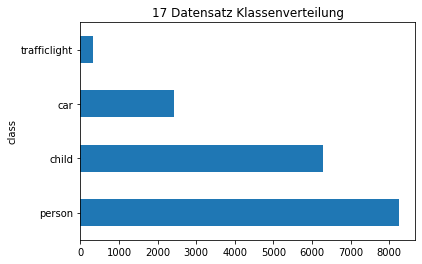

In [149]:
df_test["class"].value_counts().plot(kind="barh", title="17 Datensatz Klassenverteilung")

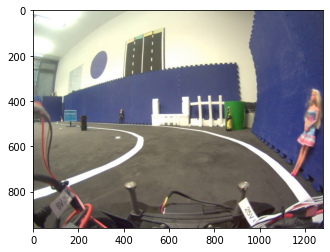

In [162]:
plt.imshow(cv2.imread(os.path.join("/data/combination_dataset/17_Combination_Dataset_data_v.1.7.0_1_3/images/", df_test[df_test["class"] == "trafficlight"].sample(1)["file"].values[0]))[:, :,::-1])

<AxesSubplot:title={'center':'15 Datensatz Klassenverteilung'}, ylabel='class'>

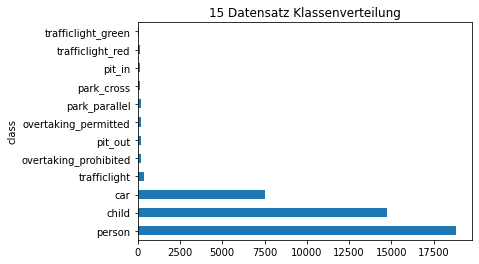

In [163]:
df["class"].value_counts().plot(kind="barh", title="15 Datensatz Klassenverteilung")

In [124]:
import yaml
with open("/data/sam.yaml", "r") as cfg:
    labels = yaml.load(cfg, yaml.SafeLoader)["names"]
    
mapping = dict(zip(labels, range(len(labels))))
mapping_reverse = dict(zip(range(len(labels)), labels))
mapping_reverse

{0: 'person',
 1: 'child',
 2: 'car',
 3: 'trafficlight',
 4: 'trafficlight_green',
 5: 'trafficlight_red'}

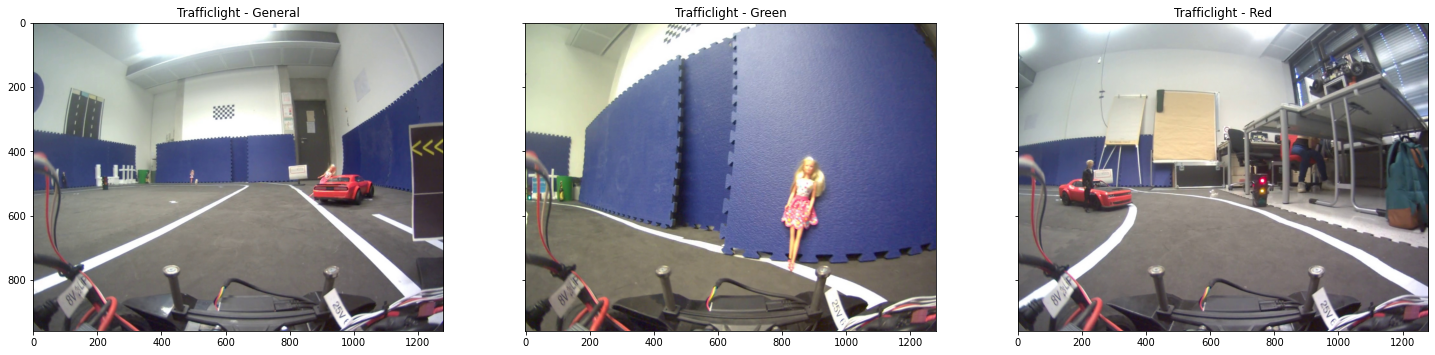

In [49]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(25, 14))

ax[0].imshow(cv2.imread(df[df["class"] == "trafficlight"].sample(1)["path"].values[0])[:, :,::-1])
ax[0].set_title("Trafficlight - General")
ax[1].imshow(cv2.imread(df[df["class"] == "trafficlight_green"].sample(1)["path"].values[0])[:, :,::-1])
ax[1].set_title("Trafficlight - Green")
ax[2].imshow(cv2.imread(df[df["class"] == "trafficlight_red"].sample(1)["path"].values[0])[:, :,::-1])
ax[2].set_title("Trafficlight - Red")
plt.show()